### Import library 

!pip install tensorflow

In [2]:
############ Data Visualization ############
import matplotlib.pyplot as plt 
import seaborn as sns

############ Data analysis & calculation ############
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)

############ Model building & Pre-Processing ############
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

### Import data 

In [3]:
import os
os.chdir(r"C:\Users\USER\Desktop\Python Code\TensorFlow") 

In [4]:
raw_dataset=pd.read_csv("Auto.csv")

In [5]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


### Missing Value

In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
(6/398)*100    # > 40% delete column & <=5% data is very large then we are allowed to delete 

1.507537688442211

In [9]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    int64  
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


### Converting data to number

In [10]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790,15.6,82,USA
394,44.0,4,97.0,52.0,2130,24.6,82,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,USA
396,28.0,4,120.0,79.0,2625,18.6,82,USA
397,31.0,4,119.0,82.0,2720,19.4,82,USA


In [11]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720,19.4,82,0,0,1


### Data Split train & Test

In [12]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Visulaization 

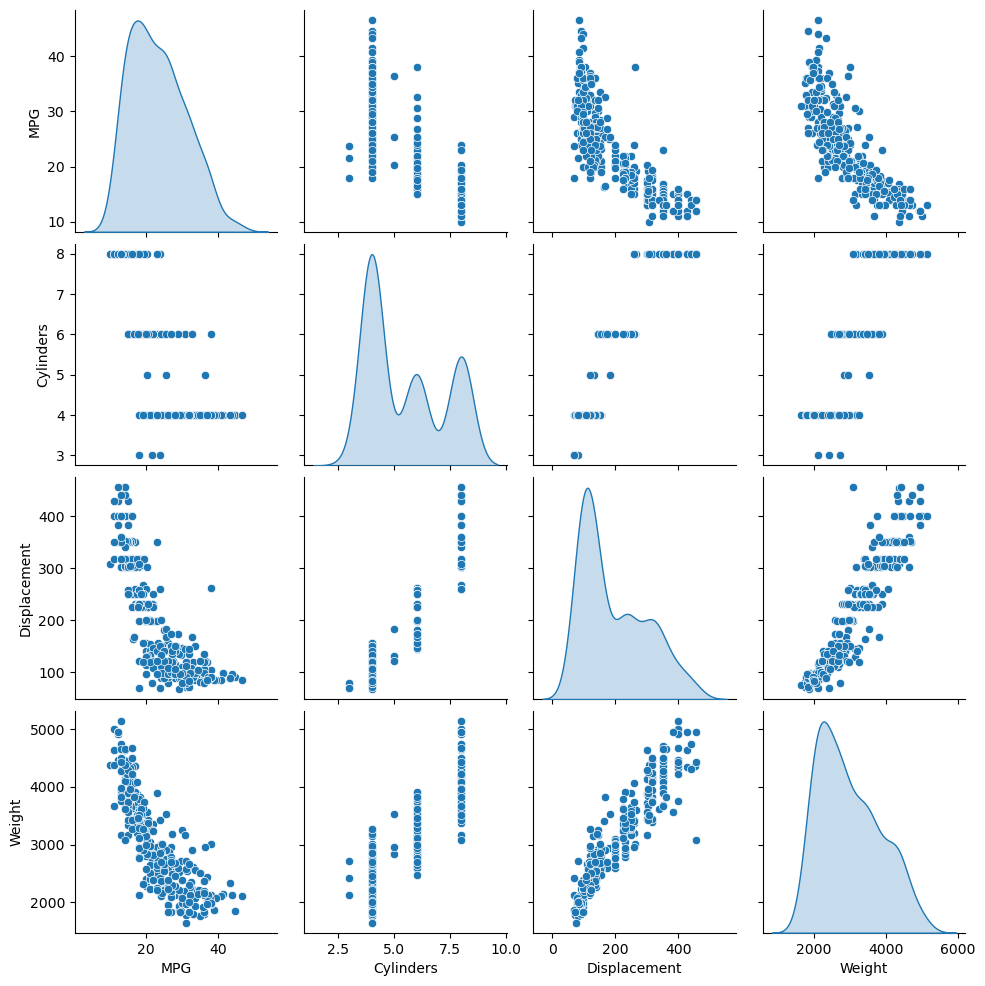

In [13]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [14]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


### Normalize the data 

In [15]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [16]:
train_labels = train_features.pop('MPG')  # Dependent Variable ( Y)  
test_labels = test_features.pop('MPG')  

In [17]:
train_labels  # Dependent Variable ( Y)

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [18]:
train_features.head() # independent Variable = X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125,14.5,74,0,0,1
282,4,140.0,88.0,2890,17.3,79,0,0,1
69,8,350.0,160.0,4456,13.5,72,0,0,1
378,4,105.0,63.0,2125,14.7,82,0,0,1
331,4,97.0,67.0,2145,18.0,80,0,1,0


In [19]:
normalizer = preprocessing.Normalization()  # scaling or z-score or normally distibuted z = data-mean/standard deviation

In [20]:
normalizer.adapt(np.array(train_features))  ### convert to array then normalizing 

In [21]:
first = np.array(train_features[:1])

with np.printoptions(precision=2): # 2 decimal upto 
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


### Method 1 - Linear Model

* dense means layer and output means prediction and param =10 means = 9x and 1 bias

In [22]:
linear_model = keras.Sequential([normalizer,layers.Dense(units=1,activation="linear",use_bias=1)])  # unit 1 means = 1 nuerons
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


* Learning rate = 0 to 1 

In [23]:
linear_model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.1),loss='mean_absolute_error')

### Repetation of Process

* Train = 60% (253 ROW)  
* Validation = 20% of train ( 63 ROW) 
* Test = 20%

In [24]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100, ## repetation 100
    verbose=1, # suppress logging
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 50ms/step - loss: 22.8429 - val_loss: 23.0627
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 22.0371 - val_loss: 22.2740
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 21.2368 - val_loss: 21.4858
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 20.4346 - val_loss: 20.6982
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 19.6262 - val_loss: 19.9096
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 18.8297 - val_loss: 19.1219
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 18.0262 - val_loss: 18.3348
Epoch 8/100
8/8 [==============================] - 0s 17ms/step - loss: 17.2200 - val_loss: 17.5476
Epoch 9/100
8/8 [==============================] - 0s 15ms/step - loss: 16.4252 - val_loss: 16.7611
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 15.6149 - val_loss: 15.9731


Epoch 84/100
8/8 [==============================] - 0s 8ms/step - loss: 2.4707 - val_loss: 2.4687
Epoch 85/100
8/8 [==============================] - 0s 10ms/step - loss: 2.4724 - val_loss: 2.4762
Epoch 86/100
8/8 [==============================] - 0s 11ms/step - loss: 2.4744 - val_loss: 2.4707
Epoch 87/100
8/8 [==============================] - 0s 15ms/step - loss: 2.4743 - val_loss: 2.4637
Epoch 88/100
8/8 [==============================] - 0s 12ms/step - loss: 2.4797 - val_loss: 2.4610
Epoch 89/100
8/8 [==============================] - 0s 9ms/step - loss: 2.4719 - val_loss: 2.4641
Epoch 90/100
8/8 [==============================] - 0s 10ms/step - loss: 2.4708 - val_loss: 2.4622
Epoch 91/100
8/8 [==============================] - 0s 10ms/step - loss: 2.4776 - val_loss: 2.4631
Epoch 92/100
8/8 [==============================] - 0s 11ms/step - loss: 2.4836 - val_loss: 2.4751
Epoch 93/100
8/8 [==============================] - 0s 11ms/step - loss: 2.4750 - val_loss: 2.4711
Epoch 94/100

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [25]:
train_results = {}
train_results['linear_model Without Hidden Layer']= linear_model.evaluate(train_features, train_labels, verbose=0)
train_results

{'linear_model Without Hidden Layer': 2.4601354598999023}

In [26]:
test_results = {}
test_results['linear_model Without Hidden Layer'] = linear_model.evaluate(test_features, test_labels, verbose=0)
test_results

{'linear_model Without Hidden Layer': 2.507197618484497}

In [27]:
train_full=pd.concat([train_features,train_labels],axis=1)
train_full.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG
146,4,90.0,75.0,2125,14.5,74,0,0,1,28.0
282,4,140.0,88.0,2890,17.3,79,0,0,1,22.3
69,8,350.0,160.0,4456,13.5,72,0,0,1,12.0
378,4,105.0,63.0,2125,14.7,82,0,0,1,38.0
331,4,97.0,67.0,2145,18.0,80,0,1,0,33.8


In [28]:
train_full["Prediction"]=linear_model.predict(train_features)
train_full.head()

10/10 [==============================] - 0s 2ms/step


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG,Prediction
146,4,90.0,75.0,2125,14.5,74,0,0,1,28.0,26.164516
282,4,140.0,88.0,2890,17.3,79,0,0,1,22.3,24.834150
69,8,350.0,160.0,4456,13.5,72,0,0,1,12.0,12.232173
378,4,105.0,63.0,2125,14.7,82,0,0,1,38.0,31.222271
331,4,97.0,67.0,2145,18.0,80,0,1,0,33.8,32.320309


# Another Model

pip install tensorflow

In [30]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

In [33]:
def build_and_compile_model(norm):
    model = keras.Sequential([norm,
      layers.Dense(64, activation='relu'),#hidden layer -1 with 64 nuerons &  relu = 0 & 1 
      layers.Dense(128, activation='relu'),#hidden layer -2 with 128 nuerons
      layers.Dense(1, activation='linear') # outer layer with 1-nuerons 
  ])

    model.compile(loss='mean_absolute_error',   # MAE 
                optimizer=tf.keras.optimizers.SGD(0.01)) # instead of Adam use SGB
    return model

# activation function = 'relu' or 'linear'

In [36]:
dnn_model = build_and_compile_model(normalizer)

dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 64)                640       
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,108
Trainable params: 9,089
Non-trainable params: 19
_________________________________________________________________


In [37]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 46ms/step - loss: 23.0925 - val_loss: 23.2742
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 22.5218 - val_loss: 22.6497
Epoch 3/100
8/8 [==============================] - 0s 20ms/step - loss: 21.8894 - val_loss: 21.9146
Epoch 4/100
8/8 [==============================] - 0s 24ms/step - loss: 21.1121 - val_loss: 20.9636
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 20.0690 - val_loss: 19.6265
Epoch 6/100
8/8 [==============================] - 0s 17ms/step - loss: 18.5406 - val_loss: 17.5674
Epoch 7/100
8/8 [==============================] - 0s 16ms/step - loss: 16.2350 - val_loss: 15.0021
Epoch 8/100
8/8 [==============================] - 0s 17ms/step - loss: 13.6563 - val_loss: 12.2423
Epoch 9/100
8/8 [==============================] - 0s 14ms/step - loss: 10.4986 - val_loss: 7.9612
Epoch 10/100
8/8 [==============================] - 0s 13ms/step - loss: 6.4885 - val_loss: 5.1696
Ep

Epoch 84/100
8/8 [==============================] - 0s 5ms/step - loss: 1.7243 - val_loss: 2.1230
Epoch 85/100
8/8 [==============================] - 0s 5ms/step - loss: 1.6970 - val_loss: 2.2645
Epoch 86/100
8/8 [==============================] - 0s 5ms/step - loss: 1.6846 - val_loss: 2.1246
Epoch 87/100
8/8 [==============================] - 0s 6ms/step - loss: 1.7284 - val_loss: 2.3074
Epoch 88/100
8/8 [==============================] - 0s 5ms/step - loss: 1.6596 - val_loss: 2.1112
Epoch 89/100
8/8 [==============================] - 0s 8ms/step - loss: 1.7212 - val_loss: 2.1960
Epoch 90/100
8/8 [==============================] - 0s 10ms/step - loss: 1.7114 - val_loss: 2.1557
Epoch 91/100
8/8 [==============================] - 0s 6ms/step - loss: 1.6817 - val_loss: 2.2739
Epoch 92/100
8/8 [==============================] - 0s 8ms/step - loss: 1.6919 - val_loss: 2.1957
Epoch 93/100
8/8 [==============================] - 0s 5ms/step - loss: 1.6487 - val_loss: 2.2393
Epoch 94/100
8/8 [=

plot_loss(history)

In [38]:
train_results

{'linear_model Without Hidden Layer': 2.4601354598999023}

In [40]:
train_results['Linear model With Hidden Layer'] = dnn_model.evaluate(train_features, train_labels, verbose=0)
train_results

{'linear_model Without Hidden Layer': 2.4601354598999023,
 'Linear With Hidden Layer': 1.7741369009017944,
 'Linear modelWith Hidden Layer': 1.7741369009017944}

In [41]:
test_results['Linear model With Hidden Layer'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_results

{'linear_model Without Hidden Layer': 2.507197618484497,
 'Linear model With Hidden Layer': 1.6679288148880005}

# Prediction --Train Dataset

In [42]:
train_full2=pd.concat([train_features,train_labels],axis=1)
train_full2.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG
146,4,90.0,75.0,2125,14.5,74,0,0,1,28.0
282,4,140.0,88.0,2890,17.3,79,0,0,1,22.3
69,8,350.0,160.0,4456,13.5,72,0,0,1,12.0
378,4,105.0,63.0,2125,14.7,82,0,0,1,38.0
331,4,97.0,67.0,2145,18.0,80,0,1,0,33.8


In [43]:
train_full2["Prediction"]=dnn_model.predict(train_features)
train_full2.head()

10/10 [==============================] - 0s 1ms/step


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG,Prediction
146,4,90.0,75.0,2125,14.5,74,0,0,1,28.0,28.623478
282,4,140.0,88.0,2890,17.3,79,0,0,1,22.3,24.222486
69,8,350.0,160.0,4456,13.5,72,0,0,1,12.0,12.484529
378,4,105.0,63.0,2125,14.7,82,0,0,1,38.0,36.366707
331,4,97.0,67.0,2145,18.0,80,0,1,0,33.8,33.673378


# Prediction --Test Dataset

In [44]:
test_full2=pd.concat([test_features,test_labels],axis=1)
test_full2.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG
9,8,390.0,190.0,3850,8.5,70,0,0,1,15.0
25,8,360.0,215.0,4615,14.0,70,0,0,1,10.0
28,8,304.0,193.0,4732,18.5,70,0,0,1,9.0
31,4,113.0,95.0,2228,14.0,71,0,1,0,25.0
33,6,232.0,100.0,2634,13.0,71,0,0,1,19.0


In [45]:
test_full2["Prediction"]=dnn_model.predict(test_features)
test_full2.head()

3/3 [==============================] - 0s 2ms/step


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG,Prediction
9,8,390.0,190.0,3850,8.5,70,0,0,1,15.0,15.612674
25,8,360.0,215.0,4615,14.0,70,0,0,1,10.0,10.744390
28,8,304.0,193.0,4732,18.5,70,0,0,1,9.0,10.842269
31,4,113.0,95.0,2228,14.0,71,0,1,0,25.0,24.132677
33,6,232.0,100.0,2634,13.0,71,0,0,1,19.0,20.944193


# Finished

# impact of below on MAE

* Activation = Linear OR Relu
* Hidden layer = 
* Optimizer  = Adam or SGB

# Model Comparision 

In [ ]:
pd.DataFrame(train_results, index=['Mean absolute error [MPG]']).T

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

## Model Saving

In [ ]:
dnn_model.save('Irfan_model')

In [ ]:
reloaded = tf.keras.models.load_model('Irfan_model')
test_results['reloaded'] = reloaded.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

* Hidden Layer is always a best model in ANN